# Минимальные остовные деревья

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

## 1. Реализация алгоритма

### Через матрицу смежности

In [2]:
def has_cycle_matrix(matrix, node):
    # кладем на стек выбранную вершину и ее "родителя"
    stack = [(node, None)]
    # будем запоминать порядок обработки вершин
    search_order = []
    # пока количество обработанных вершин меньше, чем количество вершин в графе
    while len(search_order) < len(matrix) and len(stack) > 0:
        # начинаем обрабатывать вершины с вершины стека
        current_node, parent = stack.pop()
        # если текущая вершина уже была обработана - в графе цикл
        if current_node in search_order:
            search_order.append(current_node)
            return True, search_order
        # добавляем вершину в порядок обработки
        search_order.append(current_node)
        # перебираем ребра текущей вершины в обратном порядке,
        # чтобы со стека брать вершины, начиная с наименьшего номера
        for node_d in [i for i in range(len(matrix[current_node])-1, -1, -1) if matrix[current_node][i]]:
            # не учитываем ребро от "потомка" к "родителю"
            if node_d != parent:
                # кладем на стек выбранную вершину и ее "родителя" (текущую вершину)
                stack.append((node_d, current_node))
    return False, search_order


def get_sorted_edges_by_weight_matrix(matrix):
    edges = []
    for node_s, row in enumerate(matrix):
        for node_d, weight in enumerate(row):
            # перебираем ребра в верхней части матрицы (upper triangular)
            if weight and node_s <= node_d:
                edges.append((node_s, node_d, weight))
    # сортируем ребра по весу и номеру первой вершины
    return sorted(edges, key=lambda edge: (edge[2], edge[0]))

In [3]:
def get_minimum_spanning_tree_Kruskal_algorithm_matrix(matrix):
    edges = []
    spanning_tree_matrix = [[0 for i in range(len(matrix))] for i in range(len(matrix))]
    # перебираем ребра текущего графаё, начиная с наименьшего по весу
    for node_s, node_d, _ in get_sorted_edges_by_weight_matrix(matrix):
        # добавляем ребро в остовное дерево
        spanning_tree_matrix[node_s][node_d] = 1
        spanning_tree_matrix[node_d][node_s] = 1
        # если при добавлении ребра в дереве образуется цикл
        if has_cycle_matrix(spanning_tree_matrix, node_s)[0]:
            # удаляем ребро из дерева
            spanning_tree_matrix[node_s][node_d] = 0
            spanning_tree_matrix[node_d][node_s] = 0
        # иначе оставляем ребро в дереве
        else:
            edges.append((node_s, node_d))
        if len(edges) == len(matrix) - 1:
            # остовное дерево выстроилось до перебора всех ребер исходного графа
            return edges
    return edges

### Через векторы смежности и матрицу весов

In [4]:
adjacency_vectors = [
    [1, 3],
    [0, 2, 3, 4],
    [1, 4],
    [0, 1, 4, 5],
    [1, 2, 3, 5, 6],
    [3, 4, 6],
    [4, 5],
]

weights = [
    [0,  7,  0,  5,  0,  0,  0],
    [7,  0,  8,  9,  7,  0,  0],
    [0,  8,  0,  0,  5,  0,  0],
    [5,  9,  0,  0, 15,  6,  0],
    [0,  7,  5, 15,  0,  8,  9],
    [0,  0,  0,  6,  8,  0, 11],
    [0,  0,  0,  0,  9, 11,  0],
]

In [5]:
def has_cycle_vectors(vectors, node):
    # кладем на стек выбранную вершину и ее "родителя"
    stack = [(node, None)]
    # будем запоминать порядок обработки вершин
    search_order = []
    # пока количество обработанных вершин меньше, чем количество вершин в графе
    while len(search_order) < len(vectors) and len(stack) > 0:
        # начинаем обрабатывать вершины с вершины стека
        current_node, parent = stack.pop()
        # если текущая вершина уже была обработана - в графе цикл
        if current_node in search_order:
            search_order.append(current_node)
            return True, search_order
        # добавляем вершину в порядок обработки
        search_order.append(current_node)
        # перебираем ребра текущей вершины в обратном порядке,
        # чтобы со стека брать вершины, начиная с наименьшего номера
        for node_d in sorted(vectors[current_node], reverse=True):
            # не учитываем ребро от "потомка" к "родителю"
            if node_d != parent:
                # кладем на стек выбранную вершину и ее "родителя" (текущую вершину)
                stack.append((node_d, current_node))
    return False, search_order


def get_sorted_edges_by_weight_vectors(vectors, weights):
    edges = []
    for node_s, nodes_d in enumerate(vectors):
        for node_d in nodes_d:
            # перебираем ребра в верхней части матрицы (upper triangular)
            if node_s <= node_d:
                edges.append((node_s, node_d, weights[node_s][node_d]))
    # сортируем ребра по весу и номеру первой вершины
    return sorted(edges, key=lambda edge: (edge[2], edge[0]))

In [6]:
def get_minimum_spanning_tree_Kruskal_algorithm_vectors(vectors, weights):
    edges = []
    spanning_tree_vectors = [[] for i in range(len(vectors))]
    # перебираем ребра текущего графаё, начиная с наименьшего по весу
    for node_s, node_d, _ in get_sorted_edges_by_weight_vectors(vectors, weights):
        # добавляем ребро в остовное дерево
        spanning_tree_vectors[node_s].append(node_d)
        spanning_tree_vectors[node_d].append(node_s)
        # если при добавлении ребра в дереве образуется цикл
        if has_cycle_vectors(spanning_tree_vectors, node_s)[0]:
            # удаляем ребро из дерева
            del spanning_tree_vectors[node_s][-1]
            del spanning_tree_vectors[node_d][-1]
        # иначе оставляем ребро в дереве
        else:
            edges.append((node_s, node_d))
        if len(edges) == len(vectors) - 1:
            # остовное дерево выстроилось до перебора всех ребер исходного графа
            return edges
    return edges

## 2. Проверка корректности работы

### На примере графа из лекции

In [7]:
adjacency_matrix = [
    [0,  7,  0,  5,  0,  0,  0],
    [7,  0,  8,  9,  7,  0,  0],
    [0,  8,  0,  0,  5,  0,  0],
    [5,  9,  0,  0, 15,  6,  0],
    [0,  7,  5, 15,  0,  8,  9],
    [0,  0,  0,  6,  8,  0, 11],
    [0,  0,  0,  0,  9, 11,  0],
]

#### Готовая библиотека NetworkX

In [8]:
G = nx.Graph()
for node_src, nodes_dest in enumerate(adjacency_matrix):
    for node_dest, weight in enumerate(nodes_dest):
        if weight:
            G.add_edge(node_src, node_dest, weight=weight)

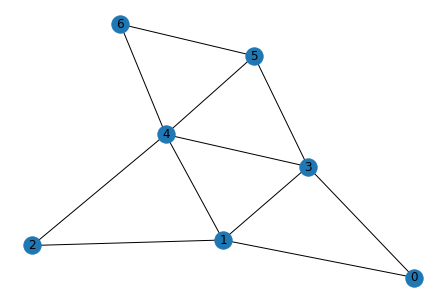

In [9]:
nx.draw(G, with_labels=True)
plt.show()

In [10]:
minimum_spanning_tree_nx = nx.minimum_spanning_tree(G)
minimum_spanning_tree_nx = sorted(minimum_spanning_tree_nx.edges)
print(minimum_spanning_tree_nx)

[(0, 1), (0, 3), (1, 4), (2, 4), (3, 5), (4, 6)]


#### Матрица смежности

In [11]:
minimum_spanning_tree_matrix = get_minimum_spanning_tree_Kruskal_algorithm_matrix(adjacency_matrix)
minimum_spanning_tree_matrix = sorted(minimum_spanning_tree_matrix)
print(minimum_spanning_tree_matrix)
print(minimum_spanning_tree_matrix == minimum_spanning_tree_nx)

[(0, 1), (0, 3), (1, 4), (2, 4), (3, 5), (4, 6)]
True


#### Векторы смежности

In [12]:
def transform_adj_matrix_into_adj_vectors(matrix):
    vectors = [[] for i in range(len(matrix))]
    for node_s, row in enumerate(adjacency_matrix):
        for node_d, weight in enumerate(row):
            if weight:
                vectors[node_s].append(node_d)
    return vectors, matrix[:]

In [13]:
adjacency_vectors, weights = transform_adj_matrix_into_adj_vectors(adjacency_matrix)

In [14]:
minimum_spanning_tree_vectors = get_minimum_spanning_tree_Kruskal_algorithm_vectors(adjacency_vectors, weights)
minimum_spanning_tree_vectors = sorted(minimum_spanning_tree_vectors)
print(minimum_spanning_tree_vectors)
print(minimum_spanning_tree_vectors == minimum_spanning_tree_nx)

[(0, 1), (0, 3), (1, 4), (2, 4), (3, 5), (4, 6)]
True


### На примере случайного графа

In [15]:
def generate_undirected_weighted_graph_adjacency_matrix(N, max_degree, max_weight):
    matrix = [[0 for i in range(N)] for i in range(N)]
    for node_s in range(N):
        nodes_d = [x for x in range(N) if x != node_s]
        for j in range(random.randint(0, max_degree)):
            node_d = nodes_d.pop(random.randint(0, len(nodes_d)-1))
            if not matrix[node_s][node_d]:
                weight = random.randint(1, max_weight)
                matrix[node_s][node_d] = weight
                matrix[node_d][node_s] = weight
    return matrix

In [16]:
N = 15
max_degree = 5
max_weight = 999

In [17]:
adjacency_matrix = generate_undirected_weighted_graph_adjacency_matrix(N, max_degree, max_weight)

#### Готовая библиотека NetworkX

In [18]:
G = nx.Graph()
for node_src, nodes_dest in enumerate(adjacency_matrix):
    for node_dest, weight in enumerate(nodes_dest):
        if weight:
            G.add_edge(node_src, node_dest, weight=weight)

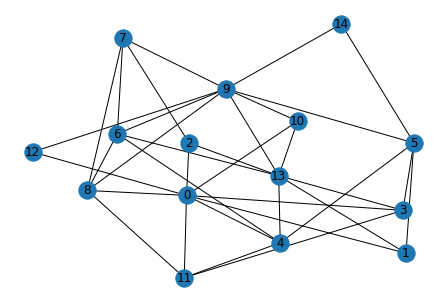

In [19]:
nx.draw(G, with_labels=True)
plt.show()

In [20]:
minimum_spanning_tree_nx = nx.minimum_spanning_tree(G)
minimum_spanning_tree_nx = sorted([sorted(edge) for edge in minimum_spanning_tree_nx.edges])
minimum_spanning_tree_nx

[[0, 14],
 [1, 7],
 [1, 10],
 [1, 11],
 [1, 12],
 [1, 14],
 [2, 5],
 [2, 8],
 [2, 9],
 [3, 11],
 [3, 13],
 [4, 14],
 [6, 13],
 [9, 12]]

#### Матрица смежности

In [21]:
minimum_spanning_tree_matrix = get_minimum_spanning_tree_Kruskal_algorithm_matrix(adjacency_matrix)
minimum_spanning_tree_matrix = sorted([sorted(edge) for edge in minimum_spanning_tree_matrix])
print(minimum_spanning_tree_matrix)
print(minimum_spanning_tree_matrix == minimum_spanning_tree_nx)

[[0, 14], [1, 7], [1, 10], [1, 11], [1, 12], [1, 14], [2, 5], [2, 8], [2, 9], [3, 11], [3, 13], [4, 14], [6, 13], [9, 12]]
True


#### Векторы смежности

In [22]:
adjacency_vectors, weights = transform_adj_matrix_into_adj_vectors(adjacency_matrix)

In [23]:
minimum_spanning_tree_vectors = get_minimum_spanning_tree_Kruskal_algorithm_vectors(adjacency_vectors, weights)
minimum_spanning_tree_vectors = sorted([sorted(edge) for edge in minimum_spanning_tree_vectors])
print(minimum_spanning_tree_vectors)
print(minimum_spanning_tree_vectors == minimum_spanning_tree_nx)

[[0, 14], [1, 7], [1, 10], [1, 11], [1, 12], [1, 14], [2, 5], [2, 8], [2, 9], [3, 11], [3, 13], [4, 14], [6, 13], [9, 12]]
True


### 3. Сравнение времени выполнения алгоритма

In [29]:
N = 500
max_degree = 30
max_weight = 99

#### Матрица смежности

In [32]:
%%timeit -r 3 -n 3 -o -q
adjacency_matrix = generate_undirected_weighted_graph_adjacency_matrix(N, max_degree, max_weight)
get_minimum_spanning_tree_Kruskal_algorithm_matrix(adjacency_matrix)

<TimeitResult : 8.12 s ± 814 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

#### Векторы смежности

In [33]:
%%timeit -r 3 -n 3 -o -q
adjacency_matrix = generate_undirected_weighted_graph_adjacency_matrix(N, max_degree, max_weight)
adjacency_vectors, weights = transform_adj_matrix_into_adj_vectors(adjacency_matrix)
get_minimum_spanning_tree_Kruskal_algorithm_vectors(adjacency_vectors, weights)

<TimeitResult : 30.3 ms ± 1.71 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

#### Готовая библиотека NetworkX

In [34]:
%%timeit -r 3 -n 3 -o -q
adjacency_matrix = generate_undirected_weighted_graph_adjacency_matrix(N, max_degree, max_weight)
G = nx.Graph()
for node_src, nodes_dest in enumerate(adjacency_matrix):
    for node_dest, weight in enumerate(nodes_dest):
        if weight:
            G.add_edge(node_src, node_dest, weight=weight)
nx.minimum_spanning_tree(G)

<TimeitResult : 65.5 ms ± 2.13 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)>

В варианте с матрицей тратится много времени на поиск ребер в разреженной матрице